<a href="https://colab.research.google.com/github/Anusarakh/thesis/blob/main/7_MARCH_24_MODEL_ML_VERSION2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 1️⃣ เชื่อม google drive

In [1]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#เข้าไป path ใน google drive
import os
os.chdir('/content/gdrive/MyDrive/Thesis/song/')

!pwd #เช็ค paht ที่กำลังทำงานอยู่

/content/gdrive/MyDrive/Thesis/song


 2️⃣ Data preparation by FV

In [3]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
import scipy.io.wavfile as wav

In [ ]:
classes_1 = 1 #เพลงแนะนำ
classes_0 = 0 #เพลงไม่แนะนำ

path_1 = '/content/gdrive/MyDrive/Thesis/song/Normallcase/fortherapyfinall/'
path_0 = '/content/gdrive/MyDrive/Thesis/song/Normallcase/nontherapyfinall/'



In [ ]:
# tempo = librosa.feature.tempo(y=x, sr=44100 , hop_length=256)
# df_tempo = pd.DataFrame(tempo)

In [ ]:
# tempo[0]

In [ ]:
x_list = os.listdir(path_0)
mfcc_mean_0 = []
mfcc_var_0 = []
spec_cen_mean_0 = []
spec_cen_var_0 = []
spec_band_mean_0 = []
spec_band_var_0 = []
zcr_mean_0 = []
zcr_var_0 = []
tempo = []
classes_0_ = []
tempo_0 = []
for i in x_list:
  x , sr = librosa.load(path_0+i, sr=44100)
  #สกัด MFCC
  mfcc = librosa.feature.mfcc(y=x, sr=44100 ,n_mfcc= 20, n_fft = 512,  hop_length=256 )
  df_mfcc = pd.DataFrame(mfcc)
  mfcc_mean = df_mfcc.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล MFCC
  #mfcc_var= df_mfcc.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล MFCC
  #สกัด spectral_centroid
  spec_cen = librosa.feature.spectral_centroid(y=x, sr=44100, S=None, n_fft=512, hop_length=256)
  df_spec_cen = pd.DataFrame(spec_cen)
  spec_cen_mean = df_spec_cen.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล spectral_centroid
  #spec_cen_var= df_spec_cen.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล spectral_centroid
  #สกัด spectral_bandwidth
  spec_band = librosa.feature.spectral_bandwidth(y=x, sr=44100, S=None, n_fft=512, hop_length=256)
  df_spec_band = pd.DataFrame(spec_band)
  spec_band_mean = df_spec_band.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล spectral_bandwidth
  #spec_band_var= df_spec_band.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล spectral_bandwidth
  #สกัด zero_crossing_rate
  zcr = librosa.feature.zero_crossing_rate(y=x, frame_length=512, hop_length=256)
  df_zcr = pd.DataFrame(zcr)
  zcr_mean = df_zcr.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล zero_crossing_rate
  #zcr_var= df_zcr.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล zero_crossing_rate
  #สกัด tempo
  tempo = librosa.feature.tempo(y=x, sr=44100 , hop_length=256)

  mfcc_mean_0.append(list(mfcc_mean))
  #mfcc_var_0.append(list(mfcc_var))
  spec_cen_mean_0.append(spec_cen_mean[0])
  #spec_cen_var_0.append(spec_cen_var[0])
  spec_band_mean_0.append(spec_band_mean[0])
  #spec_band_var_0.append(spec_band_var[0])
  zcr_mean_0.append(zcr_mean[0])
  #zcr_var_0.append(zcr_var[0])
  tempo_0.append(tempo[0])

  classes_0_.append(path_0+i)

/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
<ipython-input-7-1d6355dfcbaa>:14: UserWarning: PySoundFile failed. Trying audioread instead.
  x , sr = librosa.load(path_0+i, sr=44100)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwa

In [ ]:
x_list = os.listdir(path_1)
mfcc_mean_1 = []
#mfcc_var_1 = []
spec_cen_mean_1 = []
#spec_cen_var_1 = []
spec_band_mean_1 = []
#spec_band_var_1 = []
zcr_mean_1 = []
#zcr_var_1 = []
tempo = []
classes_1_ = []
tempo_1 = []
for i in x_list:
  x , sr = librosa.load(path_1+i, sr=44100)
  #สกัด MFCC
  mfcc = librosa.feature.mfcc(y=x, sr=44100 ,n_mfcc= 20, n_fft = 512,  hop_length=256 )
  df_mfcc = pd.DataFrame(mfcc)
  mfcc_mean = df_mfcc.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล MFCC
  #mfcc_var= df_mfcc.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล MFCC
  #สกัด spectral_centroid
  spec_cen = librosa.feature.spectral_centroid(y=x, sr=44100, S=None, n_fft=512, hop_length=256)
  df_spec_cen = pd.DataFrame(spec_cen)
  spec_cen_mean = df_spec_cen.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล spectral_centroid
  #spec_cen_var= df_spec_cen.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล spectral_centroid
  #สกัด spectral_bandwidth
  spec_band = librosa.feature.spectral_bandwidth(y=x, sr=44100, S=None, n_fft=512, hop_length=256)
  df_spec_band = pd.DataFrame(spec_band)
  spec_band_mean = df_spec_band.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล spectral_bandwidth
  #spec_band_var= df_spec_band.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล spectral_bandwidth
  #สกัด zero_crossing_rate
  zcr = librosa.feature.zero_crossing_rate(y=x, frame_length=512, hop_length=256)
  df_zcr = pd.DataFrame(zcr)
  zcr_mean = df_zcr.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล zero_crossing_rate
  #zcr_var= df_zcr.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล zero_crossing_rate
  #สกัด tempo
  tempo = librosa.feature.tempo(y=x, sr=44100, hop_length=256)


  mfcc_mean_1.append(list(mfcc_mean))
  #mfcc_var_1.append(list(mfcc_var))
  spec_cen_mean_1.append(spec_cen_mean[0])
  #spec_cen_var_1.append(spec_cen_var[0])
  spec_band_mean_1.append(spec_band_mean[0])
  #spec_band_var_1.append(spec_band_var[0])
  zcr_mean_1.append(zcr_mean[0])
  #zcr_var_1.append(zcr_var[0])
  tempo_1.append(tempo[0])

  classes_1_.append(path_1+i)

In [ ]:
mfcc_mean_0 = np.array(mfcc_mean_0)
mfcc_mean_1 = np.array(mfcc_mean_1)

mfcc_mean_df = pd.DataFrame(data = mfcc_mean_0)
mfcc_mean_df['spec'] = spec_cen_mean_0
mfcc_mean_df['specband'] = spec_band_mean_0
mfcc_mean_df['zero'] = zcr_mean_0
mfcc_mean_df['tempo'] = tempo_0
mfcc_mean_df['y'] = 0
mfcc_mean_df['path'] = classes_0_

mfcc_mean_df_1 = pd.DataFrame(data = mfcc_mean_1)
mfcc_mean_df_1['spec'] = spec_cen_mean_1
mfcc_mean_df_1['specband'] = spec_band_mean_1
mfcc_mean_df_1['zero'] = zcr_mean_1
mfcc_mean_df_1['tempo'] = tempo_1
mfcc_mean_df_1['y'] = 1
mfcc_mean_df_1['path'] = classes_1_

df_mean = mfcc_mean_df.append(mfcc_mean_df_1)

print(df_mean.shape)
df_mean.head(10)

(82, 26)


<ipython-input-14-138a8d305978>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_mean = mfcc_mean_df.append(mfcc_mean_df_1)


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,spec,specband,zero,tempo,y,path
0,-337.519196,87.713432,-53.715721,24.611065,-2.806133,30.887583,-7.148527,8.066412,-10.892270,-6.455785,...,1.112836,0.827767,1.159200,-3.363875,2416.442970,2967.178980,0.054564,88.341346,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
1,-278.316895,78.383743,-54.988045,24.794107,-16.298615,29.786839,-15.504878,17.004028,-17.566486,-2.575559,...,-1.479412,-2.492935,4.362125,-2.547994,2928.497072,3564.770500,0.064016,149.796196,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
2,-350.177734,87.633240,-35.294590,15.607514,-20.191914,27.530226,-16.834913,12.593232,-14.815978,-6.088560,...,4.112644,-1.948758,3.774891,-3.367366,2605.486756,3336.664234,0.057736,94.825115,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
3,-320.999725,83.712631,-79.178902,33.140152,-3.795419,35.310829,-3.274965,9.303448,-10.393186,-0.385239,...,-2.097874,-1.944650,4.207464,-0.871528,2567.362198,3006.088398,0.057116,117.453835,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
4,-311.984467,96.372902,-52.377071,18.820795,-19.120331,31.577271,-6.311706,6.418893,-17.262781,-5.944653,...,1.359192,-5.059597,3.112498,0.699753,2277.861900,2994.578379,0.051328,154.267724,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
5,-302.293304,89.938728,-60.427666,23.944962,-14.811761,34.267166,-11.520164,7.816845,-12.442970,-4.660617,...,-0.353574,-2.197228,2.728648,-1.200106,2545.729320,3034.276899,0.060034,113.581731,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
6,-331.316711,95.636383,-51.833839,29.361094,-8.933562,26.907310,-8.511755,2.452519,-8.992344,-9.659515,...,-0.053965,-1.728168,3.077435,0.059356,2263.551772,2802.541336,0.050841,100.348908,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
7,-329.166809,120.010048,-65.102104,15.183566,-11.102985,28.729210,-7.596907,1.045329,-1.888594,-19.360622,...,-5.914082,0.145319,0.632702,-2.270287,1929.652167,2311.806003,0.051301,147.656250,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
8,-314.127228,87.029434,-48.093918,24.881878,-19.809332,33.028419,-6.459525,2.794885,-12.668830,1.113017,...,1.428701,-2.049955,3.211311,-5.005737,2343.313648,3031.310362,0.048055,88.341346,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
9,-316.402557,95.546127,-56.068432,22.433027,-7.039863,27.494715,-13.440655,13.815747,-13.789297,-6.118659,...,1.431804,-4.313414,3.341599,-1.385850,2190.738103,2905.127025,0.047760,111.139113,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...


In [ ]:
df_mean.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,spec,specband,zero,tempo,y,path
26,-288.216492,105.524872,-80.954460,35.056065,-9.645185,24.266403,-1.170630,0.237670,-3.746842,-21.461937,...,-8.536987,3.361222,-3.762616,6.075917,2232.286376,2528.889547,0.060158,132.512019,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
27,-345.196777,121.811493,-62.470551,17.043404,-4.899828,19.309784,0.975814,-2.762484,-6.654685,-16.133682,...,-6.445205,-0.661166,0.311579,0.522443,1838.573378,2117.353407,0.049925,100.348908,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
28,-328.358368,96.155388,-78.628212,30.357790,-22.930090,23.036510,-9.613184,5.682535,-7.204242,-12.365400,...,-4.506675,-1.375507,6.218872,-0.792435,2538.326588,2801.367613,0.068082,92.285156,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
29,-408.364838,127.423607,-43.567238,25.491817,-9.548177,13.160922,6.693934,-13.867629,2.450733,-13.707789,...,-6.355654,-1.639372,4.494156,-0.554944,1406.368815,2000.222097,0.032267,124.529367,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
30,-352.436798,121.275635,-41.011406,12.119468,-11.725102,21.524416,-10.624305,-2.758912,-7.208328,-13.859457,...,-4.059094,-2.229731,3.219734,-0.320672,1615.377606,2302.834468,0.035884,132.512019,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
31,-350.730927,105.094284,-33.975479,16.462893,-4.183766,19.028992,-18.093254,11.029451,-12.951659,-5.835186,...,-4.501638,-6.351799,2.588220,-4.427691,1884.647546,2762.003610,0.041212,127.604167,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
32,-384.387390,134.208069,-29.640186,4.725500,-4.368305,17.613703,-1.561974,1.901349,-3.922768,-9.933794,...,-3.165704,-0.822320,1.527907,1.326932,1308.449741,1955.854229,0.028832,96.597547,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
33,-356.805817,88.995461,-62.817165,31.440334,-12.102773,29.732779,-19.807734,8.079273,-14.807260,-6.834245,...,-0.921311,-4.426508,5.318572,-1.229693,2621.347845,3176.336810,0.063347,164.062500,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
34,-361.276428,108.790810,-32.125118,17.413736,5.462489,21.277954,-4.656855,-1.397334,-8.667353,-4.831972,...,-2.939118,-2.575968,3.353623,-0.669726,1580.504718,2394.734163,0.031104,154.267724,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
35,-368.861053,111.820358,-34.798328,22.401121,1.234311,21.293127,1.116723,-12.186717,-1.281002,-10.190297,...,-8.198071,0.196232,-0.658384,-4.902237,1534.808876,2012.996648,0.036127,129.199219,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...


In [ ]:
df_mean

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,spec,specband,zero,tempo,y,path
0,-337.519196,87.713432,-53.715721,24.611065,-2.806133,30.887583,-7.148527,8.066412,-10.892270,-6.455785,...,1.112836,0.827767,1.159200,-3.363875,2416.442970,2967.178980,0.054564,88.341346,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
1,-278.316895,78.383743,-54.988045,24.794107,-16.298615,29.786839,-15.504878,17.004028,-17.566486,-2.575559,...,-1.479412,-2.492935,4.362125,-2.547994,2928.497072,3564.770500,0.064016,149.796196,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
2,-350.177734,87.633240,-35.294590,15.607514,-20.191914,27.530226,-16.834913,12.593232,-14.815978,-6.088560,...,4.112644,-1.948758,3.774891,-3.367366,2605.486756,3336.664234,0.057736,94.825115,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
3,-320.999725,83.712631,-79.178902,33.140152,-3.795419,35.310829,-3.274965,9.303448,-10.393186,-0.385239,...,-2.097874,-1.944650,4.207464,-0.871528,2567.362198,3006.088398,0.057116,117.453835,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
4,-311.984467,96.372902,-52.377071,18.820795,-19.120331,31.577271,-6.311706,6.418893,-17.262781,-5.944653,...,1.359192,-5.059597,3.112498,0.699753,2277.861900,2994.578379,0.051328,154.267724,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,-350.730927,105.094284,-33.975479,16.462893,-4.183766,19.028992,-18.093254,11.029451,-12.951659,-5.835186,...,-4.501638,-6.351799,2.588220,-4.427691,1884.647546,2762.003610,0.041212,127.604167,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
32,-384.387390,134.208069,-29.640186,4.725500,-4.368305,17.613703,-1.561974,1.901349,-3.922768,-9.933794,...,-3.165704,-0.822320,1.527907,1.326932,1308.449741,1955.854229,0.028832,96.597547,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
33,-356.805817,88.995461,-62.817165,31.440334,-12.102773,29.732779,-19.807734,8.079273,-14.807260,-6.834245,...,-0.921311,-4.426508,5.318572,-1.229693,2621.347845,3176.336810,0.063347,164.062500,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
34,-361.276428,108.790810,-32.125118,17.413736,5.462489,21.277954,-4.656855,-1.397334,-8.667353,-4.831972,...,-2.939118,-2.575968,3.353623,-0.669726,1580.504718,2394.734163,0.031104,154.267724,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...


In [ ]:
import pandas as pd
df_mean.to_csv("./df_mean.csv")


NameError: name 'df_mean' is not defined

## [เริ่มรัน] Split data train/teast by 80:20

In [4]:
import pandas as pd

df_mean = pd.read_csv('./df_mean.csv')
df_mean = df_mean.drop(columns=['Unnamed: 0'])

In [ ]:
# df_mean.head()

In [5]:
df_mean.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,spec,specband,zero,tempo,y,path
0,-337.519196,87.713432,-53.715721,24.611067,-2.806135,30.887583,-7.148528,8.066414,-10.892271,-6.455784,...,1.112836,0.827766,1.159201,-3.363875,2416.442970,2967.178980,0.054564,88.341346,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
1,-278.316895,78.383743,-54.988056,24.794113,-16.298620,29.786844,-15.504882,17.004032,-17.566490,-2.575557,...,-1.479412,-2.492936,4.362127,-2.547994,2928.497072,3564.770500,0.064016,149.796196,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
2,-350.177734,87.633232,-35.294605,15.607519,-20.191923,27.530233,-16.834919,12.593234,-14.815981,-6.088560,...,4.112645,-1.948760,3.774892,-3.367366,2605.486756,3336.664234,0.057736,94.825115,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
3,-320.999725,83.712631,-79.178917,33.140160,-3.795424,35.310833,-3.274970,9.303452,-10.393191,-0.385238,...,-2.097873,-1.944651,4.207465,-0.871529,2567.362198,3006.088398,0.057116,117.453835,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
4,-311.984467,96.372902,-52.377079,18.820795,-19.120331,31.577271,-6.311707,6.418894,-17.262781,-5.944652,...,1.359192,-5.059598,3.112498,0.699753,2277.861900,2994.578379,0.051328,154.267724,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...


In [6]:
path = df_mean[df_mean['y']== 0]['path'].tolist()
# print(len(path))
from random import sample
res_samle_0 = sample(path,int(len(path)*0.8))
print(len(set(res_samle_0)))

path = df_mean[df_mean['y']== 1]['path'].tolist()
# print(len(path))
from random import sample
res_samle_1 = sample(path,int(len(path)*0.8))
print(len(set(res_samle_1)))

res_samle_0.extend(res_samle_1)

print(len(res_samle_0))

36
28
64


In [7]:
train = df_mean[df_mean['path'].isin(res_samle_0)]
train['split'] = 'train'
test = df_mean[~df_mean['path'].isin(res_samle_0)]
test['split'] = 'test'

df_all = train.append(test)
print(df_all.shape)
df_all.head()

(82, 27)


<ipython-input-7-d13c214b5ed7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['split'] = 'train'
<ipython-input-7-d13c214b5ed7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['split'] = 'test'
<ipython-input-7-d13c214b5ed7>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = train.append(test)


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,spec,specband,zero,tempo,y,path,split
0,-337.519196,87.713432,-53.715721,24.611067,-2.806135,30.887583,-7.148528,8.066414,-10.892271,-6.455784,...,0.827766,1.159201,-3.363875,2416.442970,2967.178980,0.054564,88.341346,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
1,-278.316895,78.383743,-54.988056,24.794113,-16.298620,29.786844,-15.504882,17.004032,-17.566490,-2.575557,...,-2.492936,4.362127,-2.547994,2928.497072,3564.770500,0.064016,149.796196,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
3,-320.999725,83.712631,-79.178917,33.140160,-3.795424,35.310833,-3.274970,9.303452,-10.393191,-0.385238,...,-1.944651,4.207465,-0.871529,2567.362198,3006.088398,0.057116,117.453835,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
4,-311.984467,96.372902,-52.377079,18.820795,-19.120331,31.577271,-6.311707,6.418894,-17.262781,-5.944652,...,-5.059598,3.112498,0.699753,2277.861900,2994.578379,0.051328,154.267724,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
5,-302.293304,89.938728,-60.427666,23.944963,-14.811763,34.267166,-11.520166,7.816846,-12.442970,-4.660616,...,-2.197228,2.728648,-1.200106,2545.729320,3034.276899,0.060034,113.581731,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train


# 3️⃣ ML// Random Forest Classifier

In [21]:

import os
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

## Mean fv

1.4.1	criterion กำหนด ‘entropy’ และ ‘gini’

1.4.2	n_estimators กำหนด 100, 200, 400, และ 500

1.4.3	maxdepth กำหนด 5, 10, 15, 20, 25 และ 30


In [88]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

n_estimators = [100, 200, 400, 500]
max_depth = [5, 10, 15, 20, 25, 30]
criterion = ['entropy', 'gini']
#min_samples_split = [2, 5, 10, 15, 100]
forest = RandomForestClassifier(random_state = 1)
hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'criterion' : criterion} #, 'min_samples_split' : min_samples_split}
gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)
bestF_ = bestF.best_params_

forestOpt = RandomForestClassifier(random_state = 1, max_depth = bestF_['max_depth'], n_estimators = bestF_['n_estimators'], criterion = bestF_['criterion']) #, min_samples_split =bestF_['min_samples_split'])
modelOpt = forestOpt.fit(X_train, y_train)

print(bestF_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100}


In [89]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.640476,0.161992,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
1,0.638095,0.172286,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
2,0.607143,0.134792,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
3,0.607143,0.134792,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
4,0.640476,0.118307,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
5,0.626190,0.098198,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
6,0.607143,0.134792,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
7,0.609524,0.121964,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
8,0.640476,0.118307,"{'criterion': 'entropy', 'max_depth': 15, 'n_e..."
9,0.626190,0.098198,"{'criterion': 'entropy', 'max_depth': 15, 'n_e..."


In [90]:
y_pred = modelOpt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.38      0.55         8

    accuracy                           0.72        18
   macro avg       0.83      0.69      0.67        18
weighted avg       0.81      0.72      0.69        18

[[10  0]
 [ 5  3]]


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

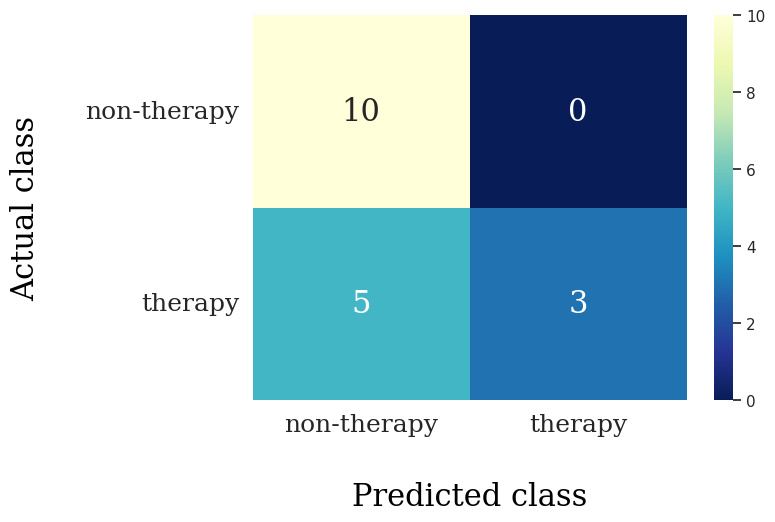

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Mean fv- Normalization

In [93]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm


n_estimators = [100, 200, 400, 500]
max_depth = [5, 10, 15, 20, 25, 30]
criterion = ['entropy', 'gini']
#min_samples_split = [2, 5, 10, 15, 100]
forest = RandomForestClassifier(random_state = 1)
hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'criterion' : criterion} #, 'min_samples_split' : min_samples_split}
gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train_norm, y_train)
bestF_ = bestF.best_params_

forestOpt = RandomForestClassifier(random_state = 1, max_depth = bestF_['max_depth'], n_estimators = bestF_['n_estimators'], criterion = bestF_['criterion']) #, min_samples_split =bestF_['min_samples_split'])
modelOpt = forestOpt.fit(X_train_norm, y_train)

print(bestF_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}


In [94]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.623810,0.166939,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
1,0.607143,0.170117,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
2,0.595238,0.117127,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
3,0.595238,0.117127,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
4,0.609524,0.137684,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
5,0.638095,0.155329,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
6,0.595238,0.117127,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
7,0.595238,0.117127,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
8,0.609524,0.137684,"{'criterion': 'entropy', 'max_depth': 15, 'n_e..."
9,0.638095,0.155329,"{'criterion': 'entropy', 'max_depth': 15, 'n_e..."


In [95]:
y_pred = modelOpt.predict(X_test_norm)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.10      0.18        10
           1       0.47      1.00      0.64         8

    accuracy                           0.50        18
   macro avg       0.74      0.55      0.41        18
weighted avg       0.76      0.50      0.39        18

[[1 9]
 [0 8]]


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

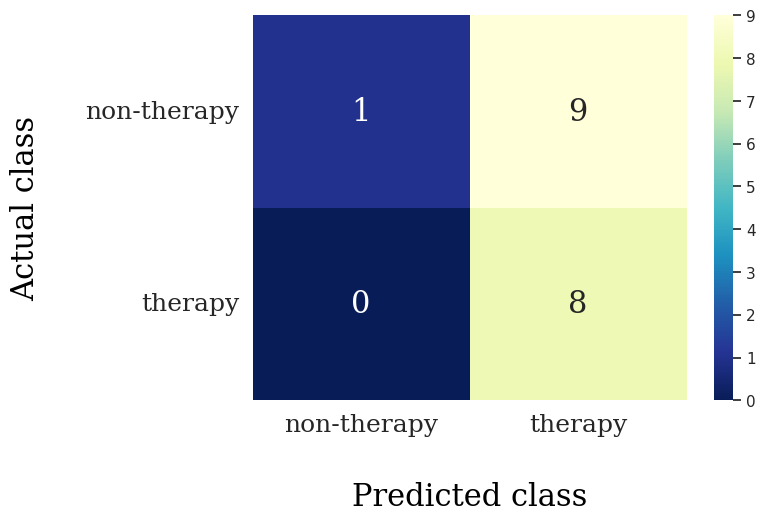

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

# 4️⃣ ML // SVM Classifier

1.2.1)	Kernel กำหนด ‘liner’, ‘rbf’ และ ‘poly’

1.2.2)	Gamma กำหนด 0.001, 0.01, 0.1 และ 1


## Mean fv

In [32]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

#Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly']

svm= svm.SVC()
param_grid = {'gamma' : gammas, 'kernel' : kernels}
grid_search = GridSearchCV(svm, param_grid, cv=10)

SVM = grid_search.fit(X_train, y_train)

# examine the first result
print("**examine the first result","\n")

print(SVM.cv_results_['params'][0])
print(SVM.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = SVM.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")
bestS_ = SVM.best_params_
print(SVM.best_score_)
print(SVM.best_params_)
print(SVM.best_estimator_)

**examine the first result 

{'gamma': 0.001, 'kernel': 'linear'}
0.5619047619047619

 **print the array of mean scores only 

[0.56190476 0.56190476 0.65952381 0.56190476 0.56190476 0.62857143
 0.56190476 0.56190476 0.64761905 0.56190476 0.56190476 0.6       ]

 **examine the best model 

0.6595238095238095
{'gamma': 0.001, 'kernel': 'poly'}
SVC(gamma=0.001, kernel='poly')


In [104]:
import pandas as pd
results_df = pd.DataFrame(SVM.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# Display the DataFrame
print(results_df)

    mean_test_score  std_test_score                                params
0          0.561905        0.061353  {'gamma': 0.001, 'kernel': 'linear'}
1          0.561905        0.061353     {'gamma': 0.001, 'kernel': 'rbf'}
2          0.561905        0.061353    {'gamma': 0.001, 'kernel': 'poly'}
3          0.561905        0.061353   {'gamma': 0.01, 'kernel': 'linear'}
4          0.561905        0.061353      {'gamma': 0.01, 'kernel': 'rbf'}
5          0.561905        0.061353     {'gamma': 0.01, 'kernel': 'poly'}
6          0.561905        0.061353    {'gamma': 0.1, 'kernel': 'linear'}
7          0.561905        0.061353       {'gamma': 0.1, 'kernel': 'rbf'}
8          0.561905        0.061353      {'gamma': 0.1, 'kernel': 'poly'}
9          0.561905        0.061353      {'gamma': 1, 'kernel': 'linear'}
10         0.561905        0.061353         {'gamma': 1, 'kernel': 'rbf'}
11         0.561905        0.061353        {'gamma': 1, 'kernel': 'poly'}


In [105]:
from sklearn import svm
svm= svm.SVC(random_state = 1, gamma = bestS_['gamma'], kernel = bestS_['kernel'])
modelOpt = svm.fit(X_train, y_train)


y_pred = modelOpt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       1.00      0.50      0.67         8

    accuracy                           0.78        18
   macro avg       0.86      0.75      0.75        18
weighted avg       0.84      0.78      0.76        18

[[10  0]
 [ 4  4]]


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

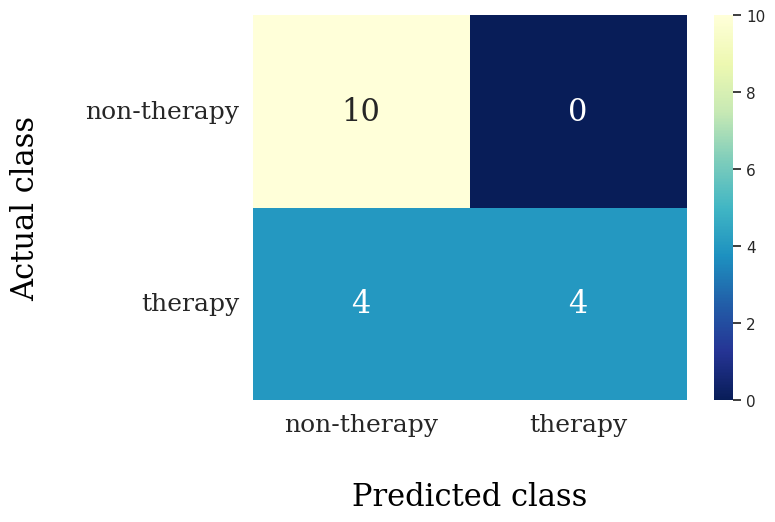

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Mean fv- Normalization

In [97]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

#Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly']

svm= svm.SVC()
param_grid = {'gamma' : gammas, 'kernel' : kernels}
grid_search = GridSearchCV(svm, param_grid, cv=10)

SVM = grid_search.fit(X_train_norm, y_train)

# examine the first result
print("**examine the first result","\n")

print(SVM.cv_results_['params'][0])
print(SVM.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = SVM.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")
bestS_ = SVM.best_params_
print(SVM.best_score_)
print(SVM.best_params_)
print(SVM.best_estimator_)

**examine the first result 

{'gamma': 0.001, 'kernel': 'linear'}
0.5619047619047619

 **print the array of mean scores only 

[0.56190476 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476
 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476]

 **examine the best model 

0.5619047619047619
{'gamma': 0.001, 'kernel': 'linear'}
SVC(gamma=0.001, kernel='linear')


In [99]:
from sklearn import svm
svm= svm.SVC(random_state = 1, gamma = bestS_['gamma'], kernel = bestS_['kernel'])
modelOpt = svm.fit(X_train_norm, y_train)

y_pred = modelOpt.predict(X_test_norm)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       0.00      0.00      0.00         8

    accuracy                           0.56        18
   macro avg       0.28      0.50      0.36        18
weighted avg       0.31      0.56      0.40        18

[[10  0]
 [ 8  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

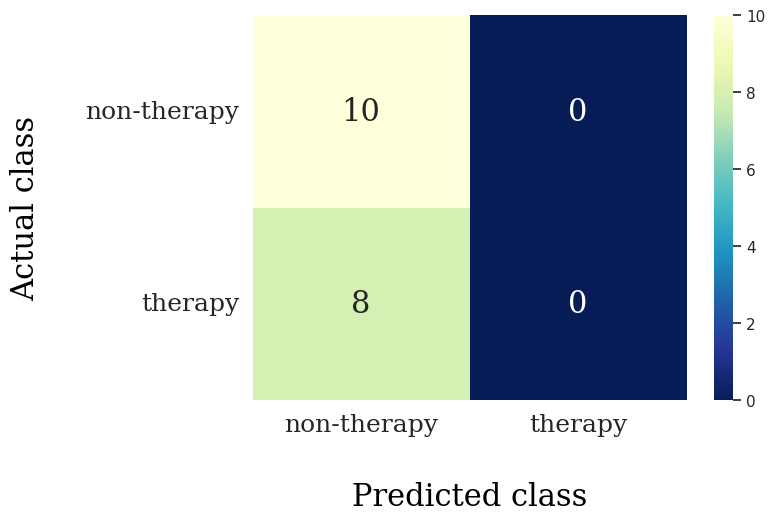

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

# 5️⃣ ML //ANN Classifier

In [ ]:
#train = df_mean[df_mean['split'] =='train']
#test = df_mean[df_mean['split'] !='train']

In [108]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

###Mean fv

  1.3.1)  solver กำหนด ‘lbfgs’, ‘sgd’ และ ‘adam’
	1.3.2)  alpha  กำหนด 0.0001, 0.001, 0.01 และ 0.1
	1.3.3)  hidden_layer_sizes กำหนด 100, 300 และ 400


In [109]:
solver = ['lbfgs', 'sgd' , 'adam']
alpha = [1e-4, 1e-3, 1e-2, 1e-1]
hidden_layer_sizes = [100, 300, 400]

clf = MLPClassifier(random_state=1)
param_gridclf = {
    'solver': solver,
    'alpha': alpha,
    'hidden_layer_sizes': hidden_layer_sizes
}

grid_search = GridSearchCV(clf, param_gridclf, cv=10)

In [113]:
bestANN = grid_search.fit(X_train, y_train)
bestANN_ = bestANN.best_params_

ANNOpt = MLPClassifier(random_state=1, solver = bestANN_['solver'], alpha = bestANN_['alpha'], hidden_layer_sizes = bestANN_['hidden_layer_sizes'])
modelANNOpt = ANNOpt.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of i

In [114]:
print(bestANN_)

{'alpha': 0.0001, 'hidden_layer_sizes': 400, 'solver': 'lbfgs'}


In [115]:
#results_df = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
#print(results_df)

ตารางผล 10 fold

In [116]:
#import pandas as pd
#results_df = pd.DataFrame(SVM.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# Display the DataFrame
#print(results_df)

In [117]:
y_predANN = ANNOpt.predict(X_test)

print(classification_report(y_test, y_predANN))
y_predANNRe = confusion_matrix(y_test, y_predANN)
print(y_predANNRe)

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.80      0.50      0.62         8

    accuracy                           0.72        18
   macro avg       0.75      0.70      0.70        18
weighted avg       0.74      0.72      0.71        18

[[9 1]
 [4 4]]


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

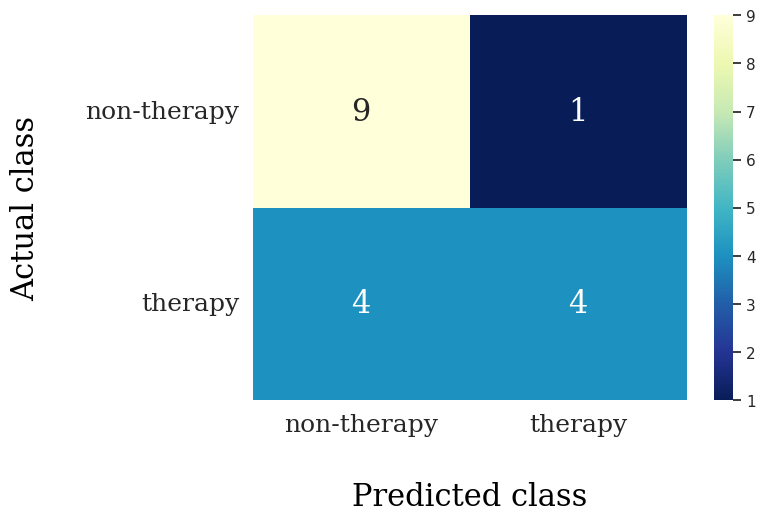

In [118]:
#plot Confusion matrix
import seaborn as sns

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(y_predANNRe, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

###Mean fa-Normalization

In [69]:
solver = ['lbfgs', 'sgd' , 'adam']
alpha = [1e-4, 1e-3, 1e-2, 1e-1]
hidden_layer_sizes = [100, 300, 400]

clfNor = MLPClassifier(random_state=1)
param_gridclfNor = {
    'solver': solver,
    'alpha': alpha,
    'hidden_layer_sizes': hidden_layer_sizes
}

grid_searchNor = GridSearchCV(clfNor, param_gridclfNor, cv=10)

bestANNNor = grid_searchNor.fit(X_train_norm, y_train)
bestANNNor_ = bestANNNor.best_params_

ANNNorOpt = MLPClassifier(random_state=1, solver = bestANNNor_['solver'], alpha = bestANNNor_['alpha'], hidden_layer_sizes = bestANNNor_['hidden_layer_sizes'])
modelANNNorOpt = ANNNorOpt.fit(X_train_norm, y_train)

print(bestANNNor_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

{'alpha': 0.001, 'hidden_layer_sizes': 400, 'solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [70]:
print(bestANNNor_)

{'alpha': 0.001, 'hidden_layer_sizes': 400, 'solver': 'lbfgs'}


In [71]:
y_predANNNor = ANNNorOpt.predict(X_test)

print(classification_report(y_test, y_predANNNor))
y_predANNReNor = confusion_matrix(y_test, y_predANNNor)
print(y_predANNReNor)

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       0.00      0.00      0.00         8

    accuracy                           0.56        18
   macro avg       0.28      0.50      0.36        18
weighted avg       0.31      0.56      0.40        18

[[10  0]
 [ 8  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

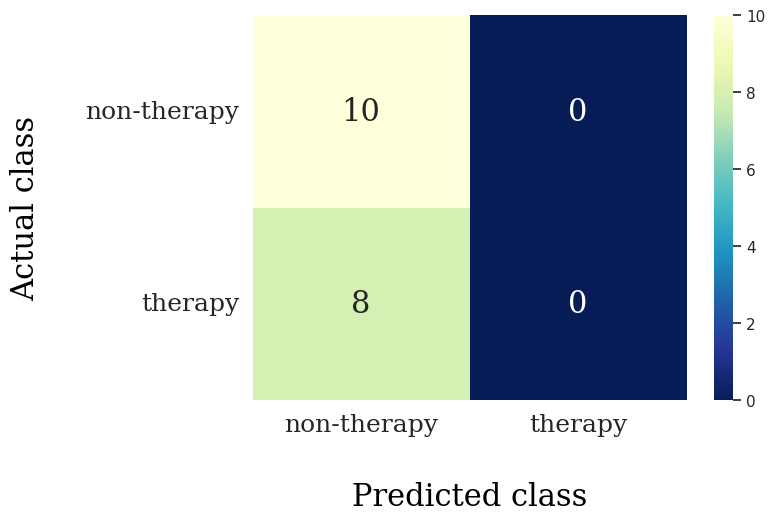

In [72]:
#plot Confusion matrix
import seaborn as sns

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(y_predANNReNor, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

# 6️⃣ ML // KNN Classifier

## Mean fv

1.1.1)	n_neighbors กำหนด 3, 5, 7 และ 9

1.1.2)	Weights กำหนด ‘uniform’และ ‘distance’


In [44]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

In [54]:
n_neighbors = [3, 5, 7, 9]
weights = ['uniform', 'distance']  # Corrected parameter name

knn = KNeighborsClassifier()
param_gridknn = {
    'n_neighbors': n_neighbors,
    'weights': weights  # Corrected parameter name
}

grid_search_knn = GridSearchCV(knn, param_gridknn, cv=10)

bestknn = grid_search_knn.fit(X_train, y_train)
bestknn_ = bestknn.best_params_

knnOpt = KNeighborsClassifier(n_neighbors=bestknn_['n_neighbors'], weights=bestknn_['weights'])  # Corrected parameter name
modelknnOpt = knnOpt.fit(X_train, y_train)

print(bestknn_)

{'n_neighbors': 3, 'weights': 'uniform'}


In [60]:
y_predknn = modelknnOpt.predict(X_test)

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_predknn))

cmknn = (confusion_matrix(y_test, y_predknn))#performance
print(cmknn)

              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.60      0.38      0.46         8

    accuracy                           0.61        18
   macro avg       0.61      0.59      0.58        18
weighted avg       0.61      0.61      0.59        18

[[8 2]
 [5 3]]


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

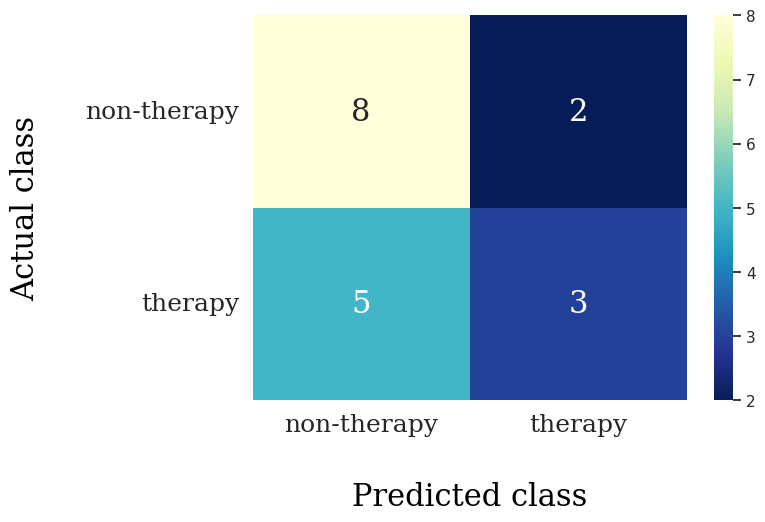

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cmknn, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Mean fv- Normalization

In [62]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm

In [66]:
n_neighbors = [3, 5, 7, 9]
weights = ['uniform', 'distance']  # Corrected parameter name

knnNor = KNeighborsClassifier()
param_gridknnNor = {
    'n_neighbors': n_neighbors,
    'weights': weights  # Corrected parameter name
}

grid_search_knnNor = GridSearchCV(knnNor, param_gridknnNor, cv=10)

bestknnNor = grid_search_knnNor.fit(X_train_norm, y_train)
bestknnNor_ = bestknnNor.best_params_

knnNorOpt = KNeighborsClassifier(n_neighbors=bestknnNor_['n_neighbors'], weights=bestknnNor_['weights'])  # Corrected parameter name
modelknnNorOpt = knnOpt.fit(X_train_norm, y_train)

print(bestknn_)

{'n_neighbors': 3, 'weights': 'uniform'}


In [67]:
y_predknnNor = modelknnNorOpt.predict(X_test)

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_predknnNor))

cmknnNor = (confusion_matrix(y_test, y_predknnNor))#performance
print(cmknnNor)

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       0.00      0.00      0.00         8

    accuracy                           0.56        18
   macro avg       0.28      0.50      0.36        18
weighted avg       0.31      0.56      0.40        18

[[10  0]
 [ 8  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

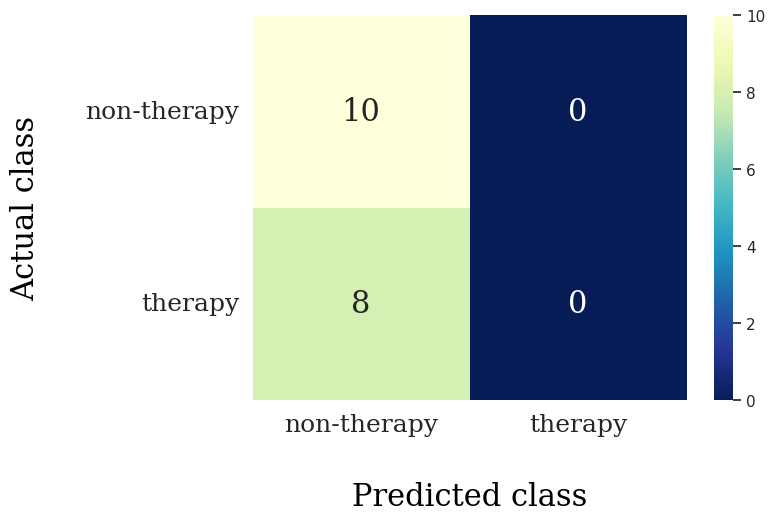

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}



sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cmknnNor, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) # Blues, Oranges, Reds, YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)